In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\ChethanM\Desktop\loan_train.csv")

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: ...working... done

# All requested packages already installed.



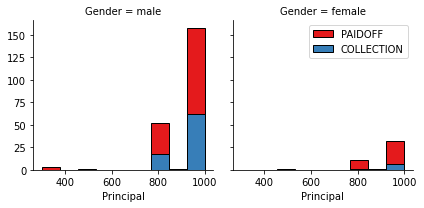

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

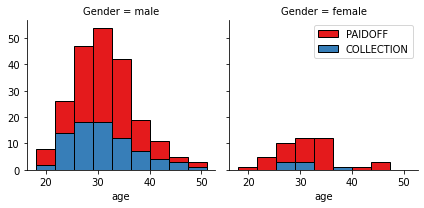

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

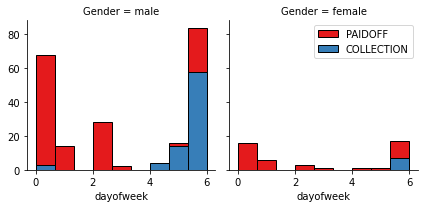

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [17]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [18]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

# Normalize Data

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [19]:
from sklearn import preprocessing

In [20]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification

Training set to build an accurate model. Then we will use the test set to report the accuracy of the model.                        
We are using the following algorithm:            

K Nearest Neighbor(KNN)               
Decision Tree                      
Support Vector Machine                  
Logistic Regression                 

Lets build the Model YAY !

K Nearest Neighbor (KNN)

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [23]:
for k in range(1, 10):
    knn_model  = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
    knn_yhat = knn_model.predict(x_test)
    print("For K = {} accuracy = {}".format(k,accuracy_score(y_test,knn_yhat)))

For K = 1 accuracy = 0.6714285714285714
For K = 2 accuracy = 0.6571428571428571
For K = 3 accuracy = 0.7142857142857143
For K = 4 accuracy = 0.6857142857142857
For K = 5 accuracy = 0.7571428571428571
For K = 6 accuracy = 0.7142857142857143
For K = 7 accuracy = 0.7857142857142857
For K = 8 accuracy = 0.7571428571428571
For K = 9 accuracy = 0.7571428571428571


In [24]:
print("We can see that the KNN model is the best for K=7")

We can see that the KNN model is the best for K=7


In [25]:
best_knn_model = KNeighborsClassifier(n_neighbors = 7).fit(x_train, y_train)
best_knn_model

KNeighborsClassifier(n_neighbors=7)

In [26]:
knn_model  = KNeighborsClassifier(n_neighbors = 7).fit(x_train, y_train)
knn_yhat = knn_model.predict(x_test)

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools

In [28]:
print (classification_report(y_test,knn_yhat))

              precision    recall  f1-score   support

  COLLECTION       0.50      0.40      0.44        15
     PAIDOFF       0.84      0.89      0.87        55

    accuracy                           0.79        70
   macro avg       0.67      0.65      0.66        70
weighted avg       0.77      0.79      0.78        70



In [29]:
cm=confusion_matrix(y_test,knn_yhat)
cm

array([[ 6,  9],
       [ 6, 49]], dtype=int64)

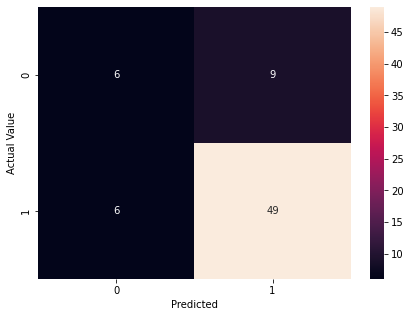

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel('Actual Value')
plt.show()

Decision Tree

In [31]:
# importing libraries
from sklearn.tree import DecisionTreeClassifier

In [32]:
for d in range(1,10):
    dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = d).fit(x_train, y_train)
    dt_yhat = dt.predict(x_test)
    print("For depth = {}  the accuracy score is {} ".format(d, accuracy_score(y_test, dt_yhat)))

For depth = 1  the accuracy score is 0.7857142857142857 
For depth = 2  the accuracy score is 0.7857142857142857 
For depth = 3  the accuracy score is 0.6142857142857143 
For depth = 4  the accuracy score is 0.6142857142857143 
For depth = 5  the accuracy score is 0.6428571428571429 
For depth = 6  the accuracy score is 0.7714285714285715 
For depth = 7  the accuracy score is 0.7571428571428571 
For depth = 8  the accuracy score is 0.7571428571428571 
For depth = 9  the accuracy score is 0.6571428571428571 


In [33]:
print("The best value of depth is d = 2 ")

The best value of depth is d = 2 


In [34]:
## Creating the best model for decision tree with best value of depth 2

best_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2).fit(x_train, y_train)
best_dt_model

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [35]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2).fit(x_train, y_train)
dt_yhat = dt.predict(x_test)

In [36]:
print(classification_report(y_test,dt_yhat))

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        15
     PAIDOFF       0.79      1.00      0.88        55

    accuracy                           0.79        70
   macro avg       0.39      0.50      0.44        70
weighted avg       0.62      0.79      0.69        70



C:\Users\ChethanM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ChethanM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ChethanM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
cm2=confusion_matrix(y_test,dt_yhat)
cm2

array([[ 0, 15],
       [ 0, 55]], dtype=int64)

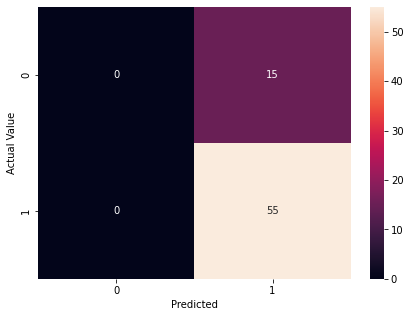

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm2,annot=True)
plt.xlabel("Predicted")
plt.ylabel('Actual Value')
plt.show()

Support Vector Machine

In [39]:
#importing svm
from sklearn import svm 
from sklearn.metrics import f1_score

In [40]:
for k in ('linear', 'poly', 'rbf','sigmoid'):
    svm_model = svm.SVC( kernel = k).fit(x_train,y_train)
    svm_yhat = svm_model.predict(x_test)
    print("For kernel: {}, the f1 score is: {}".format(k,f1_score(y_test,svm_yhat, average='weighted')))

For kernel: linear, the f1 score is: 0.6914285714285714
For kernel: poly, the f1 score is: 0.7064793130366899
For kernel: rbf, the f1 score is: 0.7275882012724117
For kernel: sigmoid, the f1 score is: 0.6892857142857144


In [41]:
print("We can see the rbf has the best f1 score of 0.7275882012724117 ")

We can see the rbf has the best f1 score of 0.7275882012724117 


In [42]:
## building best SVM with kernel = rbf
best_svm = svm.SVC(kernel='rbf').fit(x_train,y_train)
best_svm

SVC()

In [43]:
svm_model = svm.SVC( kernel = 'rbf').fit(x_train,y_train)
svm_yhat = svm_model.predict(x_test)

In [44]:
print(classification_report(y_test,svm_yhat))

              precision    recall  f1-score   support

  COLLECTION       0.36      0.27      0.31        15
     PAIDOFF       0.81      0.87      0.84        55

    accuracy                           0.74        70
   macro avg       0.59      0.57      0.57        70
weighted avg       0.72      0.74      0.73        70



In [45]:
cm3=confusion_matrix(y_test,svm_yhat)
cm3

array([[ 4, 11],
       [ 7, 48]], dtype=int64)

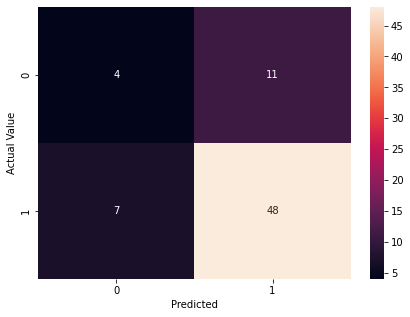

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm3,annot=True)
plt.xlabel("Predicted")
plt.ylabel('Actual Value')
plt.show()

Logistic Regression

In [47]:
# importing libraries
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import log_loss

In [48]:
for k in ('lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag'):
    lr_model = LogisticRegression(C = 0.01, solver = k).fit(x_train, y_train)
    lr_yhat = lr_model.predict(x_test)
    y_prob = lr_model.predict_proba(x_test)
    print('When Solver is {}, logloss is : {}'.format(k, log_loss(y_test, y_prob)))

When Solver is lbfgs, logloss is : 0.4920179847937498
When Solver is saga, logloss is : 0.4920179272277169
When Solver is liblinear, logloss is : 0.5772287609479654
When Solver is newton-cg, logloss is : 0.4920178014679269
When Solver is sag, logloss is : 0.49201861243085393


In [49]:
print("We can see that the best solver is liblinear of 0.5772287609479654")

We can see that the best solver is liblinear of 0.5772287609479654


In [50]:
# Best logistic regression model with liblinear solver

best_lr_model = LogisticRegression(C = 0.01, solver = 'liblinear').fit(x_train, y_train)
best_lr_model

LogisticRegression(C=0.01, solver='liblinear')

In [51]:
    lr_model = LogisticRegression(C = 0.01, solver = 'liblinear').fit(x_train, y_train)
    lr_yhat = lr_model.predict(x_test)
    y_prob = lr_model.predict_proba(x_test)

In [52]:
print(classification_report(y_test,lr_yhat))

              precision    recall  f1-score   support

  COLLECTION       0.18      0.13      0.15        15
     PAIDOFF       0.78      0.84      0.81        55

    accuracy                           0.69        70
   macro avg       0.48      0.48      0.48        70
weighted avg       0.65      0.69      0.67        70



In [53]:
cm4=confusion_matrix(y_test,lr_yhat)
cm4

array([[ 2, 13],
       [ 9, 46]], dtype=int64)

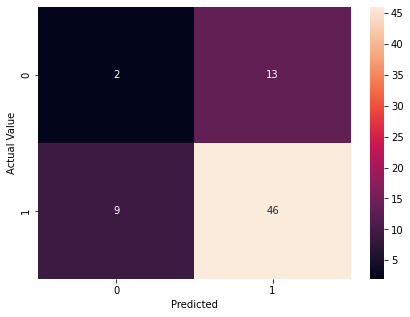

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm4,annot=True)
plt.xlabel("Predicted")
plt.ylabel('Actual Value')
plt.show()

# Model Evaluation using Test set

In [55]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [56]:
test_df=pd.read_csv(r"C:\Users\ChethanM\Desktop\loan_test.csv")
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [57]:
# data processing
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

Feature1 = test_df[['Principal','terms','age','Gender','weekend']]
Feature1 = pd.concat([Feature1,pd.get_dummies(test_df['education'])], axis=1)
Feature1.drop(['Master or Above'], axis = 1,inplace=True)


x_loan_test = Feature1
x_loan_test = preprocessing.StandardScaler().fit(x_loan_test).transform(x_loan_test)

y_loan_test = test_df['loan_status'].values

In [58]:
test_df["loan_status"].value_counts()

PAIDOFF       40
COLLECTION    14
Name: loan_status, dtype: int64

KNN Model

In [59]:
knn_yhat = best_knn_model.predict(x_loan_test)

In [60]:
print(classification_report(y_loan_test,knn_yhat))

              precision    recall  f1-score   support

  COLLECTION       0.25      0.14      0.18        14
     PAIDOFF       0.74      0.85      0.79        40

    accuracy                           0.67        54
   macro avg       0.49      0.50      0.49        54
weighted avg       0.61      0.67      0.63        54



In [61]:
cm=confusion_matrix(y_loan_test,knn_yhat)
cm

array([[ 2, 12],
       [ 6, 34]], dtype=int64)

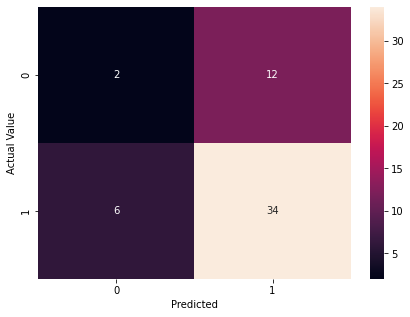

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel('Actual Value')
plt.show()

Decision Tree

In [63]:
dt_yhat = best_dt_model.predict(x_loan_test)

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        14
     PAIDOFF       0.74      1.00      0.85        40

    accuracy                           0.74        54
   macro avg       0.37      0.50      0.43        54
weighted avg       0.55      0.74      0.63        54



C:\Users\ChethanM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ChethanM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ChethanM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


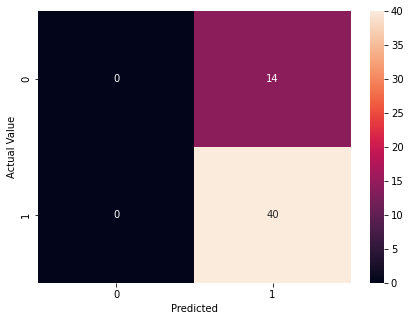

In [64]:
print(classification_report(y_loan_test,dt_yhat))
cm6=confusion_matrix(y_loan_test,dt_yhat)
cm6
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm6,annot=True)
plt.xlabel("Predicted")
plt.ylabel('Actual Value')
plt.show()

Support Vector Machine

In [65]:
svm_yhat = best_svm.predict(x_loan_test)

              precision    recall  f1-score   support

  COLLECTION       0.80      0.29      0.42        14
     PAIDOFF       0.80      0.97      0.88        40

    accuracy                           0.80        54
   macro avg       0.80      0.63      0.65        54
weighted avg       0.80      0.80      0.76        54



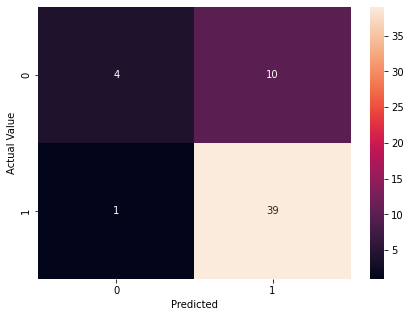

In [66]:
print(classification_report(y_loan_test,svm_yhat))
cm7=confusion_matrix(y_loan_test,svm_yhat)
cm7
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm7,annot=True)
plt.xlabel("Predicted")
plt.ylabel('Actual Value')
plt.show()

Linear Regression

In [67]:
lr_yhat = best_lr_model.predict(x_loan_test)

              precision    recall  f1-score   support

  COLLECTION       0.50      0.07      0.12        14
     PAIDOFF       0.75      0.97      0.85        40

    accuracy                           0.74        54
   macro avg       0.62      0.52      0.49        54
weighted avg       0.69      0.74      0.66        54



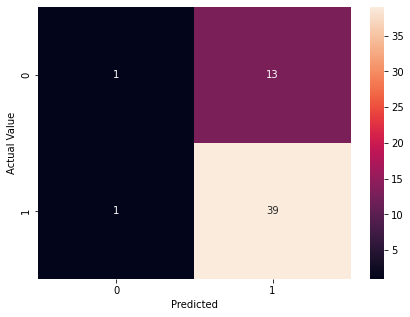

In [68]:
print(classification_report(y_loan_test,lr_yhat))
cm7=confusion_matrix(y_loan_test,lr_yhat)
cm7
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm7,annot=True)
plt.xlabel("Predicted")
plt.ylabel('Actual Value')
plt.show()

# Jaccard Index of all 4 Model

In [69]:
# Jaccard

# KNN
knn_yhat = best_knn_model.predict(x_loan_test)
jacc1 = round(jaccard_score(y_loan_test, knn_yhat,pos_label = "PAIDOFF"), 2)

# Decision Tree
dt_yhat = best_dt_model.predict(x_loan_test)
jacc2 = round(jaccard_score(y_loan_test, dt_yhat,pos_label = "PAIDOFF"), 2)

# Support Vector Machine
svm_yhat = best_svm.predict(x_loan_test)
jacc3 = round(jaccard_score(y_loan_test, svm_yhat,pos_label = "PAIDOFF"), 2)

# Logistic Regression
lr_yhat = best_lr_model.predict(x_loan_test)
jacc4 = round(jaccard_score(y_loan_test, lr_yhat,pos_label = "PAIDOFF"), 2)

jss = [jacc1, jacc2, jacc3, jacc4]
jss

[0.65, 0.74, 0.78, 0.74]

In [70]:
columns = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression']
index = ['Jaccard']

accuracy_df = pd.DataFrame([jss], index = index, columns = columns)
accuracy_df1 = accuracy_df.transpose()
accuracy_df1.columns.name = 'Algorithm'
accuracy_df1

Algorithm,Jaccard
KNN,0.65
Decision Tree,0.74
SVM,0.78
Logistic Regression,0.74
